<a href="https://colab.research.google.com/github/Vilars/Data-201/blob/main/Project_Two_NFL_Passing_(2001_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
df = pd.read_csv('/content/passing_cleaned.csv', index_col=0) # Import the dataset
df.head()

,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,36,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,26,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,32,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,26,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,27,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


In [ ]:
df.drop('G', axis=1,inplace=True) # Remove Games Played column
df.head()

,Player,Tm,Age,GS,Cmp,Att,Cmp%,Yds,TD,TD%,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,375,546,68.7,4830,36,6.6,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,343,547,62.7,4131,26,4.8,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,314,510,61.6,3921,32,6.3,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,312,558,55.9,3832,26,4.7,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,361,549,65.8,3828,27,4.9,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


In [ ]:
teams = df.groupby(['Year']) # Group by 'Tm' and 'Year' simultaneously
team_yards = teams['Yds'].mean() # Calculate the mean of 'Yds' for each group
team_yards = team_yards.sort_values(ascending=False) # Sort the results in descending order
full_data_string = team_yards.round(0).to_string() # Convert the sorted results to a string
print(full_data_string) # Print the entire sorted results

Year
2015    1543.0
2013    1520.0
2012    1482.0
2016    1363.0
2011    1306.0
2017    1305.0
2014    1289.0
2019    1264.0
2023    1236.0
2007    1236.0
2018    1229.0
2022    1198.0
2010    1186.0
2020    1165.0
2021    1155.0
2006    1146.0
2005    1140.0
2008    1114.0
2009    1101.0
2002    1086.0
2001    1025.0
2004    1003.0
2003     905.0


In [ ]:
# Group data by team and calculate total passing yards for each team
team_total_yards = df.groupby('Tm')['Yds'].sum()
team_total_yards_sorted = team_total_yards.sort_values(ascending=False)
team_total_yards_sorted.head()
print("Total Passing Yards per Team:\n", team_total_yards_sorted)

Total Passing Yards per Team:
 Tm
NOR    101414
GNB     95398
IND     95078
NWE     93717
DET     93621
PHI     93223
TAM     92158
PIT     91389
KAN     91264
DAL     90755
ATL     90034
MIN     88201
DEN     88155
NYG     88072
CIN     88009
MIA     86741
SEA     86521
ARI     86031
WAS     85944
JAX     83644
HOU     83327
SFO     83196
BUF     82460
TEN     82279
CLE     81140
BAL     80391
CAR     79877
CHI     78216
NYJ     78003
OAK     66666
SDG     60441
STL     53741
LAR     37067
LAC     36492
LVR     20705
2TM     18138
3TM         0
Name: Yds, dtype: int64


In [ ]:
ratings = df['Rate'].to_numpy()
high_ratings_mask = ratings > 100
filtered_df = df[high_ratings_mask]
# Now filtered_df contains only rows where the quarterback rating is above 100

In [ ]:
4
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#
X = df.drop(columns=["Rate", "Player", "Tm"])
y = df["Rate"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 179.5015261745645
R² Score: 0.8474886005818647


- This metric represents the average squared difference between the actual values and the predicted values. A value of approximately 179.5 suggests that, on average, the squared error is relatively low, which implies the predictions are close to the actual values.
- The R² score, also called the coefficient of determination, indicates how well the independent variables explain the variance in the dependent variable. An R² of 0.8475 means that 84.75% of the variance in the target is explained by the model. This is very high, suggesting that the chosen features (like Age, Cmp, Att, TD, Rate, etc.) are very good predictors of Rate in this dataset.

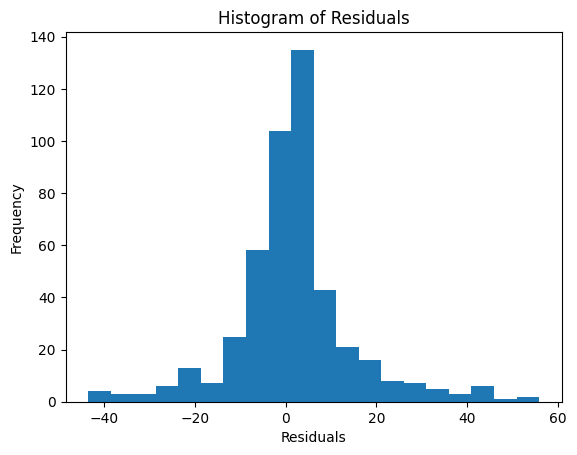

In [ ]:
5 #Create a histrogram of residuals

residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

The histogram of the residuals is fairly symmetric around the mean (0).  There is a single, clear peak in the center.  Also, the tails of the distribution get closer to 0 frequencies on both sides.  These are all characteristics of a Gaussian distribution.

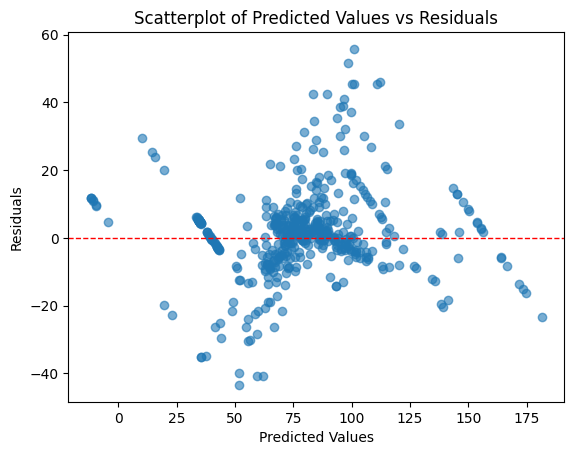

In [ ]:
6
# Residuals: Difference between actual and predicted values
residuals = y_test - y_pred

# Scatterplot of predicted values vs residuals
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Scatterplot of Predicted Values vs Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
7
#
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

       Coefficient
Age       0.121580
GS        0.504109
Cmp       0.033364
Att      -0.085047
Cmp%      0.569299
Yds       0.007520
TD        0.715484
TD%      -4.117274
Int      -1.498103
Int%      9.717450
1D        0.013698
Lng       0.101676
Y/A     -21.277668
AY/A     24.483617
Y/C       0.085700
Y/G       0.007082
Sk        0.098908
Yds-s    -0.006940
Sk%      -0.474056
NY/A     -0.673634
ANY/A    -1.918725
Year     -0.039377


CMP%: indicates more completion are associated with higher ratings.

Att: unsuccesful attempts lead to lower ratings.

Yds: More yards passing are associated with higher rating.

TD: Touchdowns are strongly associated with higher ratings.

Int: more interceptions lead to lower ratings

AY/A: Attempt per yards lead to higher rating

Y/G: quarterbacks with more yards per game have higher ratings

In [ ]:
print(model.intercept_)

110.19937026905079
